In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
pieces = []
columns = ['name', 'sex', 'births']

for year in range(1880, 2011):
    path  = './babynames/yob%d.txt'%year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

# 合并
names = pd.concat(pieces, ignore_index=True)

In [3]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
name      1690784 non-null object
sex       1690784 non-null object
births    1690784 non-null int64
year      1690784 non-null int64
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [4]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [5]:
total_birth = names.pivot_table('births', index='year',
                                columns='sex', aggfunc=sum)

In [6]:
total_birth.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


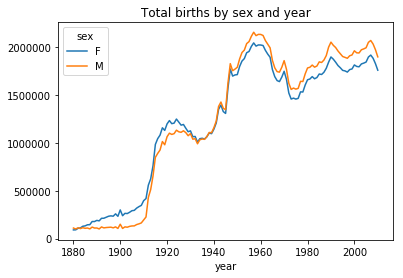

In [7]:
total_birth.plot(title='Total births by sex and year')

In [8]:
# 插入prop列，存放指定的婴儿比例
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [9]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [10]:
# 验证分组的总和是否为1
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
      M      1.0
1884  F      1.0
      M      1.0
1885  F      1.0
      M      1.0
1886  F      1.0
      M      1.0
1887  F      1.0
      M      1.0
1888  F      1.0
      M      1.0
1889  F      1.0
      M      1.0
1890  F      1.0
      M      1.0
1891  F      1.0
      M      1.0
1892  F      1.0
      M      1.0
1893  F      1.0
      M      1.0
1894  F      1.0
      M      1.0
            ... 
1996  F      1.0
      M      1.0
1997  F      1.0
      M      1.0
1998  F      1.0
      M      1.0
1999  F      1.0
      M      1.0
2000  F      1.0
      M      1.0
2001  F      1.0
      M      1.0
2002  F      1.0
      M      1.0
2003  F      1.0
      M      1.0
2004  F      1.0
      M      1.0
2005  F      1.0
      M      1.0
2006  F      1.0
      M      1.0
2007  F      1.0
      M      1.0
2008  F      1.0
      M      1.0
2009  F      1.0
    

In [11]:
# 求解每对sex/year组合的前1000个名字
def get_top_1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]


In [12]:
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top_1000)
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     794  1880  0.008726
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2010 M   1677617       Yair   M     201  2010  0.000106
         1677616      Talan   M     201  2010  0.000106
         1677614      Keyon   M     201  2010  0.000106
         1677613       Kael   M     201  2010  0.000106
         1677618   Demarion   M     200  2010  0.000105
         1677619     Gibson   M     200  2010  0.000105
         1677620     Reagan   M     200  2010  0.000105
         1677621  Cristofer   M     199  2010  0.000105
         1677622     Daylen   M     199  2010  0.000105
         1677623     Jordon   M     199  2010  0.000105
         1677624    Dashawn   M     198  2010  0.000104
         1677625      Masen   M     198  2010  0.000104
         1677629      Rowen   M     197  2010  0.000104
         1677631     Yousef   M     197  2010  0.000104
         1677630   Thaddeus   M     197  2010  0.000104
         1677628      Kadin   M     197  2010  0.000104
         1677627     Dillan   M     197  2010  0.000104
         1677626   Clarence   M     197  2010  0.000104
         1677634      Slade   M     196  2010  0.000103
         1677632    Clinton   M     196  2010  0.000103
         1677633    Sheldon   M     196  2010  0.000103
         1677636    Keshawn   M     195  2010  0.000103
         1677637   Menachem   M     195  2010  0.000103
         1677635     Joziah   M     195  2010  0.000103
         1677638     Bailey   M     194  2010  0.000102
         1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [13]:
top1000.reset_index(inplace=True, drop=True)

In [14]:
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [15]:
len(top1000)

261877

In [16]:
# 分析命名趋势
boys = top1000[top1000.sex=='M']
girls = top1000[top1000.sex=='F']

In [17]:
total_birth = top1000.pivot_table('births', index='year', 
                                  columns='name', aggfunc=sum)

In [18]:
total_birth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f71eb2f98>,
      dtype=object)

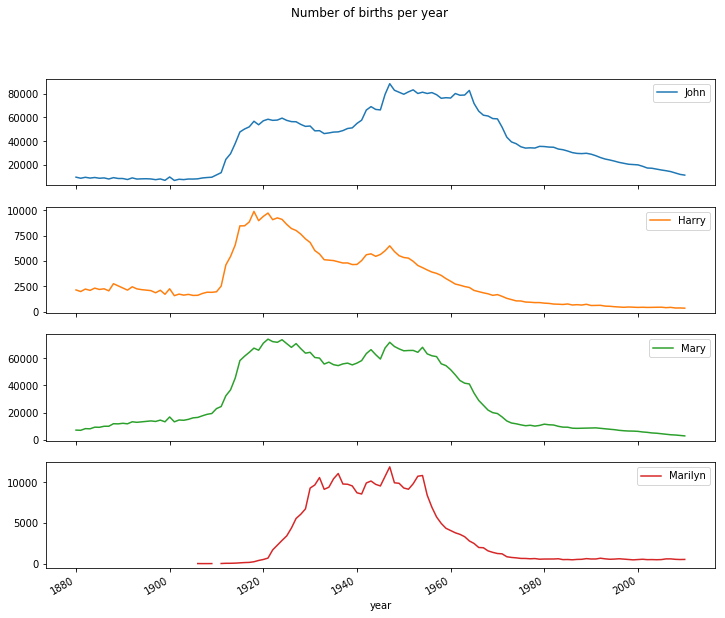

In [19]:
# 每年叫做John和Mary的婴儿数
subset = total_birth[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10),
            grid=False,
            title='Number of births per year')

In [20]:
# 评估命名多样性的增长
# 计算最流行的1000个名字所占的比例
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)

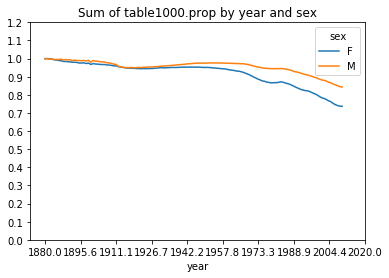

In [21]:
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13),
           xticks=np.linspace(1880, 2020, 10))

In [22]:
# 2010年男孩中出生前50人数的不同名字的数量
df = boys[boys.year==2010]

In [23]:
df.head()

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887


In [24]:
# 先对prop进行排序，然后利用numpy找到0.5的位置
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [25]:
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [26]:
prop_cumsum.values.searchsorted(0.5)

116

In [27]:
# 117个名字就占据了50%的人数，同理可以分析1900年
df = boys[boys.year==1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [28]:
in1900.values.searchsorted(0.5)+1

25

In [29]:
# 对所有的year/sex进行上述计算
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

In [30]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)

In [31]:
diversity.head()

year  sex
1880  F      38
      M      14
1881  F      38
      M      14
1882  F      38
dtype: int64

In [32]:
diversity = diversity.unstack('sex')

In [33]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


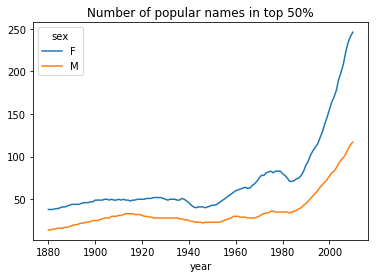

In [34]:
diversity.plot(title='Number of popular names in top 50%')

In [35]:
# “最后一个字母”的变革，发现名字最后一个字母发生了显著变化。
get_last_letter = lambda x: x[-1]
last_letter = names.name.map(get_last_letter)
last_letter.name = 'last_letter'

table = names.pivot_table('births', index=last_letter,
                          columns=['sex', 'year'], aggfunc=sum)

In [36]:
table.head()

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   

sex                                       ...            M            \
year            1887     1888     1889    ...         2001      2002   
last_letter                               ...                          
a            48942.0  59442.0  58631.0    ...      39124.0   38815.0   
b                NaN      NaN      NaN    ...      50950.0   49284.0   
c                NaN      NaN      NaN    ...      27113.0   27238.0   
d             1027.0   1298.0   1374.0    ...      60838.0   55829.0   
e            54353.0  66750.0  66663.0    ...     145395.0  144651.0   

sex                                                                      \
year             2003      2004      2005      2006      2007      2008   
last_letter                                                               
a             37825.0   38650.0   36838.0   36156.0   34654.0   32901.0   
b             48065.0   45914.0   43144.0   42600.0   42123.0   39945.0   
c             27697.0   26778.0   26078.0   26635.0   26864.0   25318.0   
d             53391.0   51754.0   50670.0   51410.0   50595.0   47910.0   
e            144769.0  142098.0  141123.0  142999.0  143698.0  140966.0   

sex                              
year             2009      2010  
last_letter                      
a             31430.0   28438.0  
b             38862.0   38859.0  
c             24048.0   23125.0  
d             46172.0   44398.0  
e            135496.0  129012.0  

[5 rows x 262 columns]

In [37]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [38]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [39]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [40]:
letter_prop = subtable / subtable.sum()
letter_prop.head()

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959

In [41]:
import matplotlib.pyplot as plt

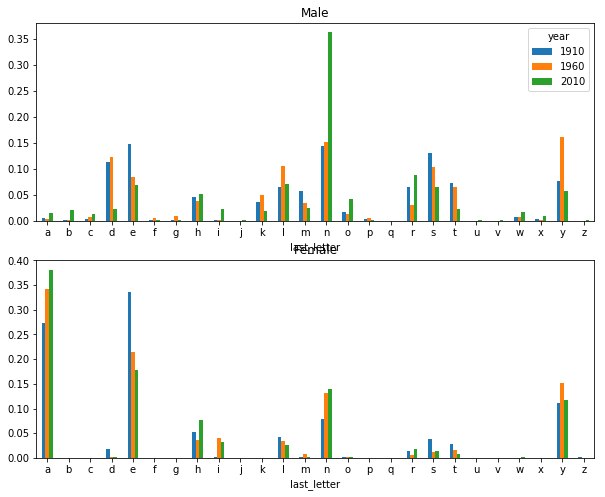

In [44]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

In [45]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


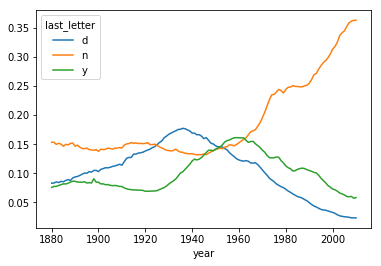

In [46]:
dny_ts.plot()

In [47]:
# 变成女孩名字的男孩名字以及反过来的情况
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [48]:
# 利用这个结果过滤其他的名字，并按名字计算出生数以查看相对频率
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [50]:
# 然后按照性别和年度进行聚合，并按照年度规范化处理
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.head()

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


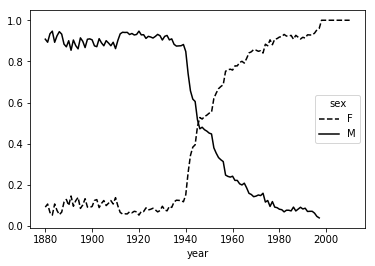

In [51]:
table.plot(style={'M': 'k-', 'F':'k--'})